## Algerian Forest Fire Dataset

 

In [140]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# predict temprature

In [141]:
dataset = pd.read_csv(r"C:\Users\Sakshi Srivastava\python_DS\forestfire-main\forestfire-main\dataset\Algerian_forest_fires_dataset_UPDATE.csv")
dataset.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [142]:
dataset.info()
# all columns are object type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.1+ KB


## Data Cleaning

In [143]:
# Handling missing values
dataset[dataset.isnull().any(axis=1)] #return a DataFrame consisting of all the rows in dataset that have at least one missing value.

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,14,7,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [144]:
#  we add a new column telling region

dataset.loc[:122,"region"]=0
dataset.loc[122:,'region']=1
df=dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          245 non-null    object 
 1   month        245 non-null    object 
 2   year         245 non-null    object 
 3   Temperature  245 non-null    object 
 4    RH          245 non-null    object 
 5    Ws          245 non-null    object 
 6   Rain         245 non-null    object 
 7   FFMC         245 non-null    object 
 8   DMC          245 non-null    object 
 9   DC           245 non-null    object 
 10  ISI          245 non-null    object 
 11  BUI          245 non-null    object 
 12  FWI          245 non-null    object 
 13  Classes      244 non-null    object 
 14  region       247 non-null    float64
dtypes: float64(1), object(14)
memory usage: 29.1+ KB


In [145]:
# convert region type to int
df['region']=df[['region']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 247 entries, 0 to 246
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          245 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
 14  region       247 non-null    int32 
dtypes: int32(1), object(14)
memory usage: 28.1+ KB


In [146]:
# remove row with missing values
df.isnull().sum() 
# return a Series where the index is the column names of df and the values are the counts of NaNs in each column.

day            2
month          2
year           2
Temperature    2
 RH            2
 Ws            2
Rain           2
FFMC           2
DMC            2
DC             2
ISI            2
BUI            2
FWI            2
Classes        3
region         0
dtype: int64

In [147]:
df=df.dropna().reset_index(drop=True)
df.head()

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0


In [148]:
df.isnull().sum()
# removed nan values

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
region         0
dtype: int64

In [149]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,1


In [150]:
df = df.drop(122).reset_index(drop = True)
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
122,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [151]:
df.columns=df.columns.str.strip()
df.columns
# removes any spaces present in the column names

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'region'],
      dtype='object')

In [152]:
# convert type into integer and float correspondingly
df[['day','month','year','Temperature','RH','Ws']]=df[['day','month','year','Temperature','RH','Ws']].astype(int)
df[['FFMC','DMC','DC','ISI','BUI','FWI','Rain']]=df[['FFMC','DMC','DC','ISI','BUI','FWI','Rain']].astype(float)

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int32  
 1   month        243 non-null    int32  
 2   year         243 non-null    int32  
 3   Temperature  243 non-null    int32  
 4   RH           243 non-null    int32  
 5   Ws           243 non-null    int32  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  region       243 non-null    int32  
dtypes: float64(7), int32(7), object(1)
memory usage: 22.0+ KB


In [154]:
#Now we save the cleaned dataset into another csv file
df.to_csv('cleaned_dataset', index=False)

#### EDA


In [155]:
# we'll predict FWI. Date will not play any major role so we drop it

df_copy = df.drop(['day','month','year'],axis=1)

# categories in classes

df_copy['Classes'].value_counts()

Classes
fire             131
not fire         101
fire               4
fire               2
not fire           2
not fire           1
not fire           1
not fire           1
Name: count, dtype: int64

In [156]:
# remove spaces and everything

df_copy['Classes'] = np.where(df_copy['Classes'].str.contains("not"),0,1)


<function matplotlib.pyplot.show(close=None, block=None)>

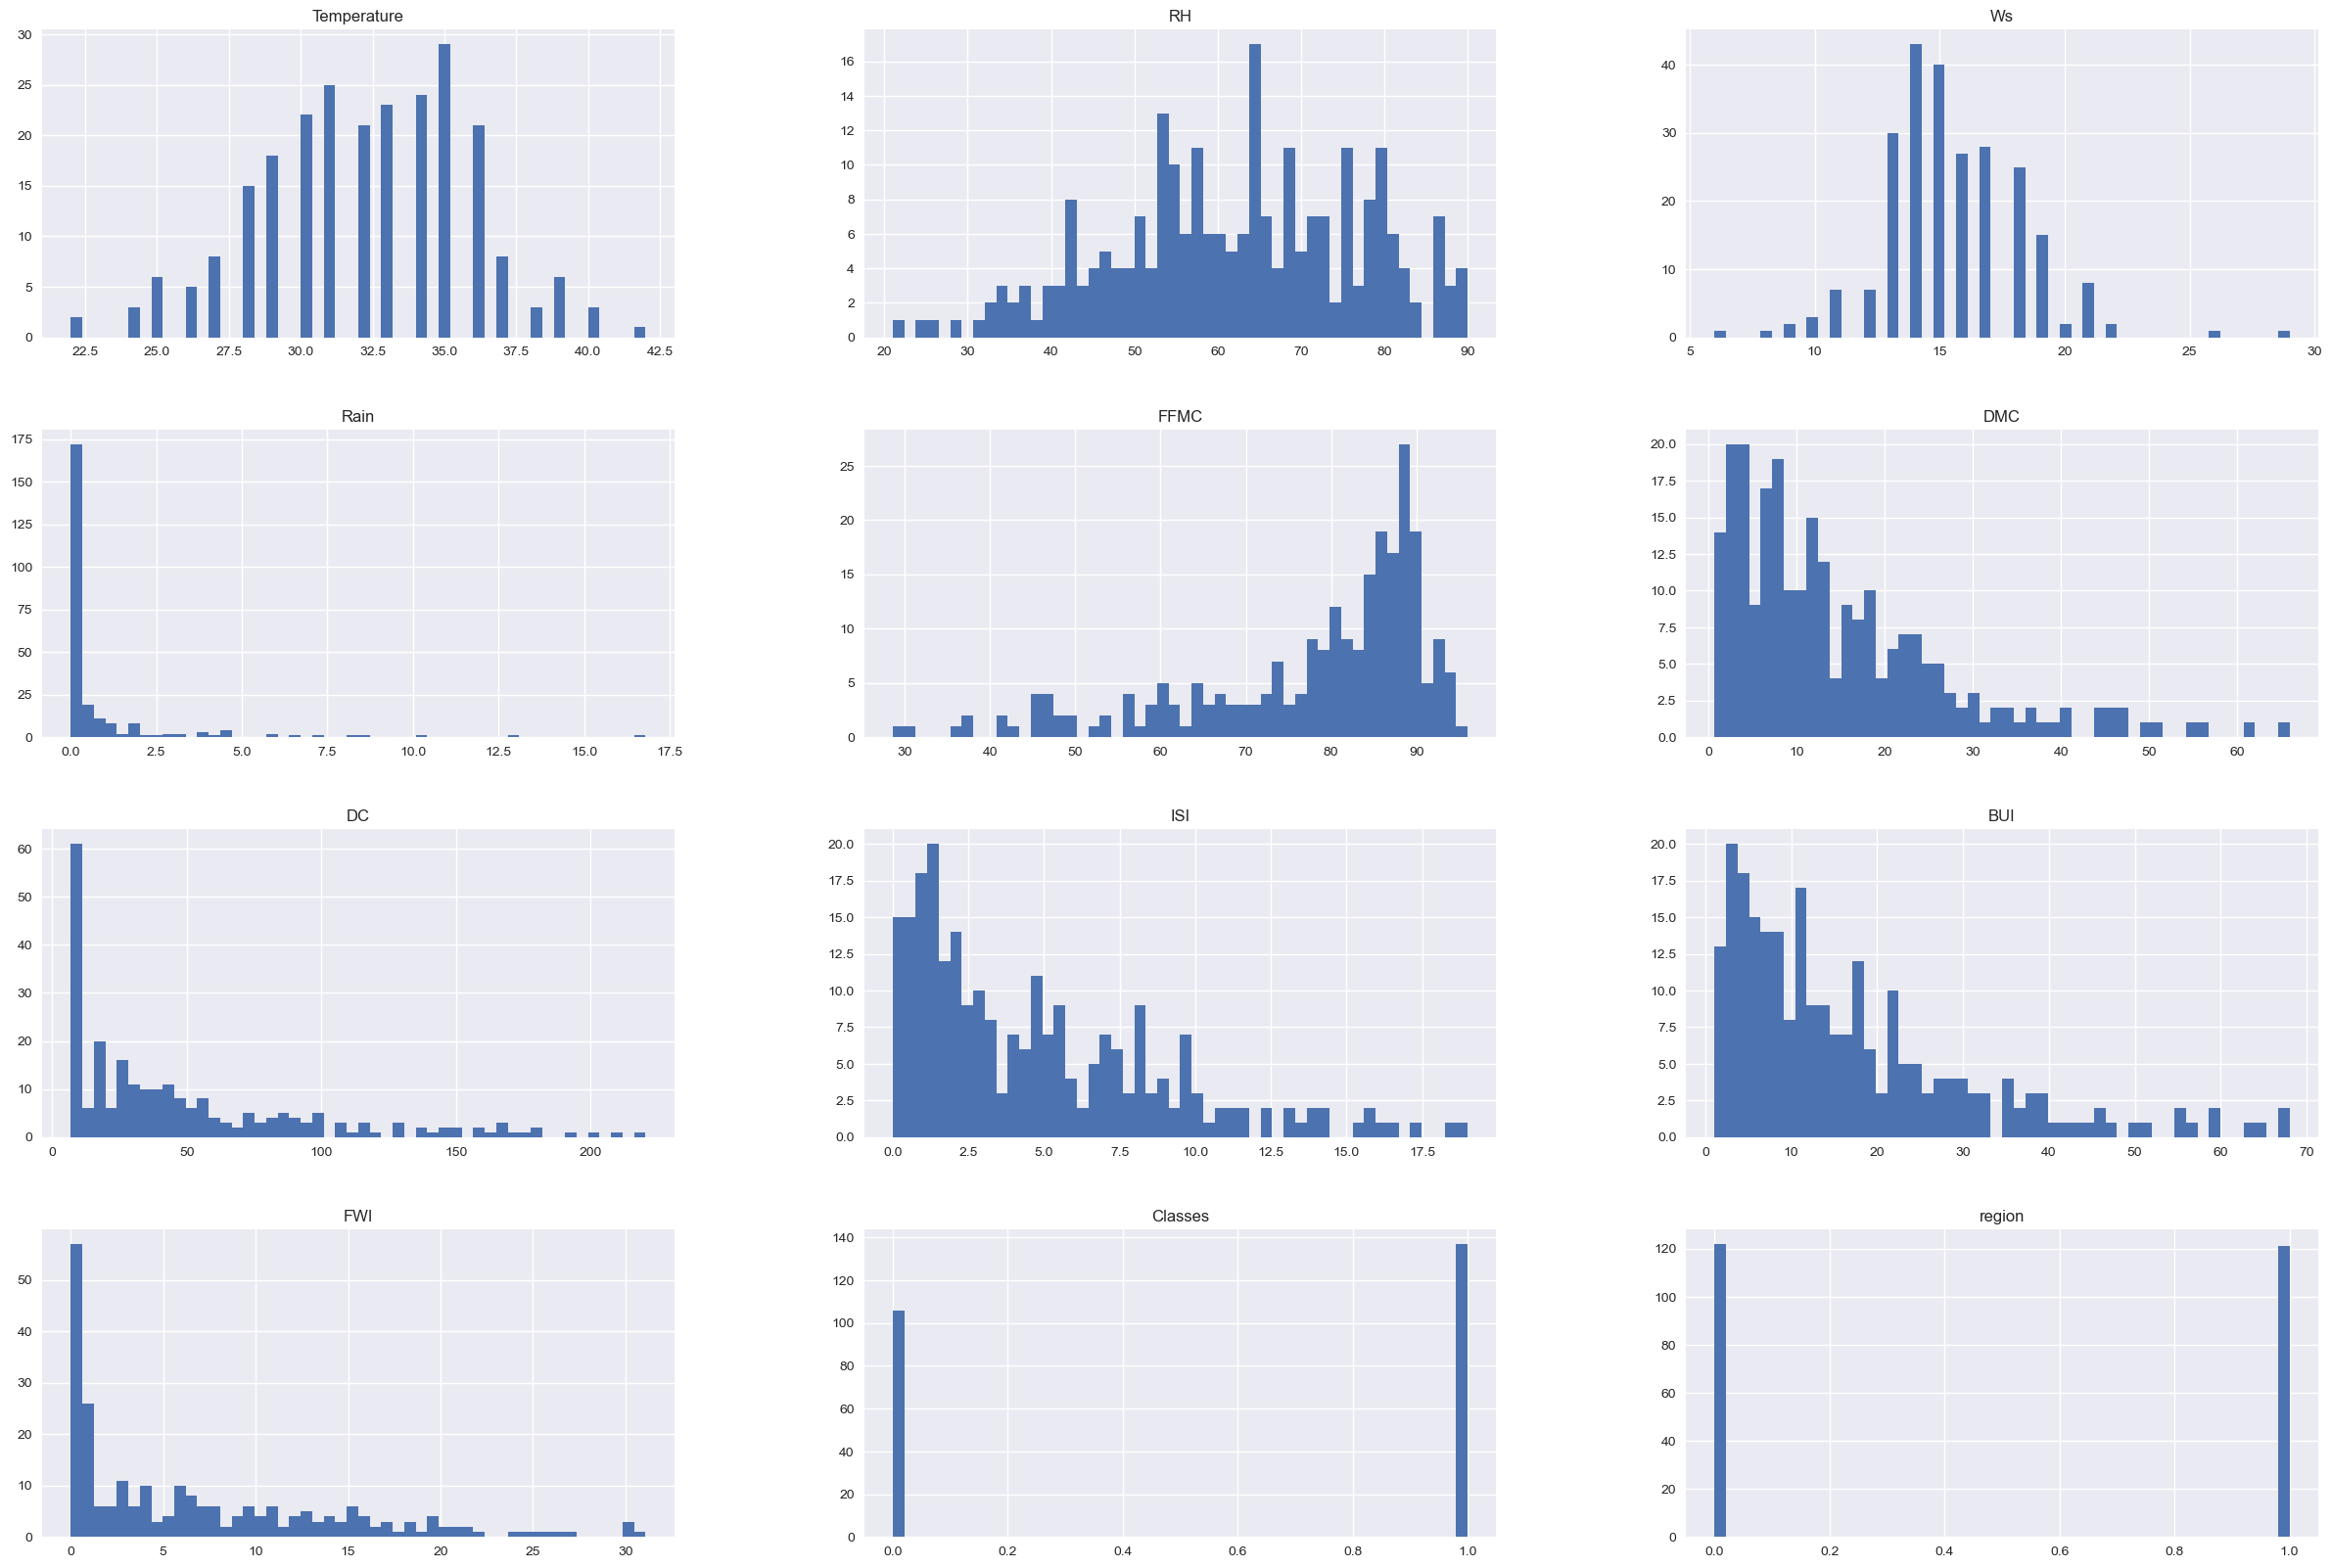

In [157]:
# plot density plot for all features
plt.style.use('seaborn-v0_8')
# plt.style.available
df_copy.hist(bins=50,figsize=(30,20))
plt.show


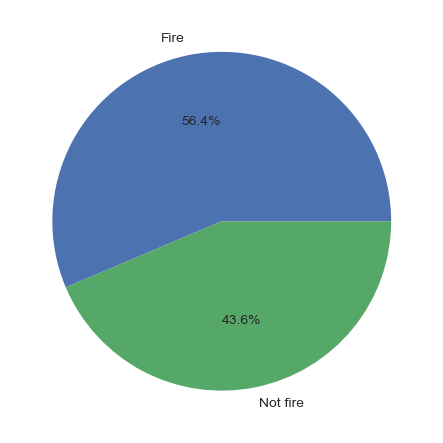

In [158]:
# percentage for pie chart
percentage = df_copy['Classes'].value_counts(normalize=True)
classlabels = ['Fire','Not fire']
plt.figure()
plt.pie(percentage,labels=classlabels,autopct='%.1f%%')
plt.show()

<Axes: >

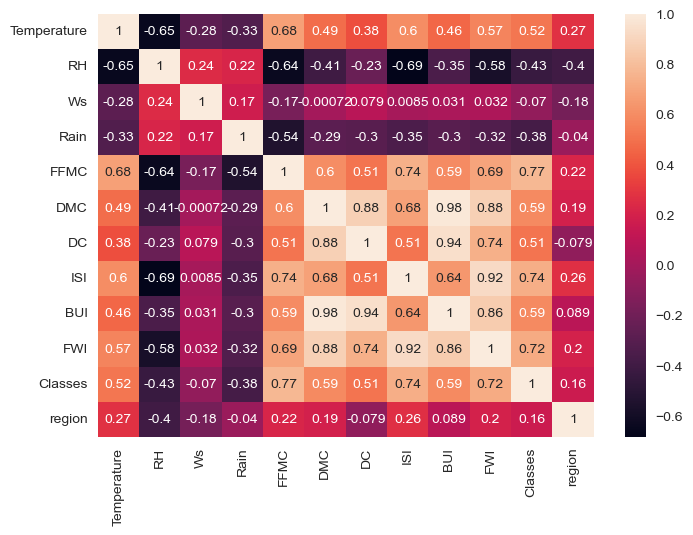

In [159]:
#  correlation
# df_copy.corr()
sns.heatmap(df_copy.corr(), annot=True)

Text(0.5, 1.0, 'Fire Analysis of Sidi- Bel Regions')

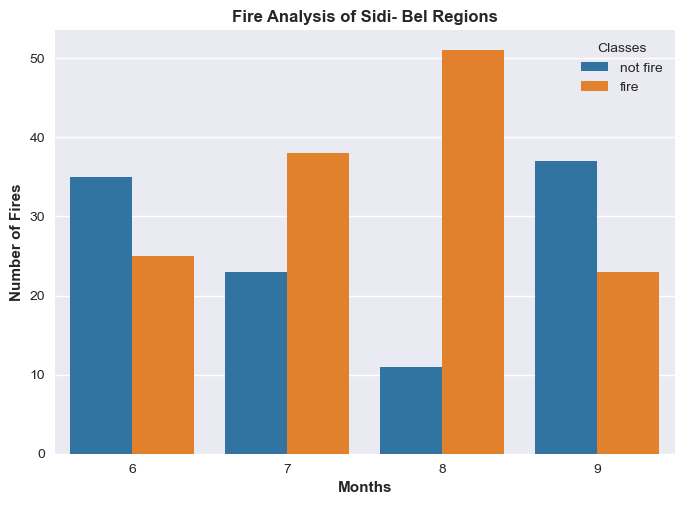

In [160]:
df['Classes']=np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

## Monthly Fire Analysis
dftemp=df.loc[df['region']==1]
plt.subplots()
# sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df, palette='tab10')
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Sidi- Bel Regions",weight='bold')

Text(0.5, 1.0, 'Fire Analysis of Brjaia Regions')

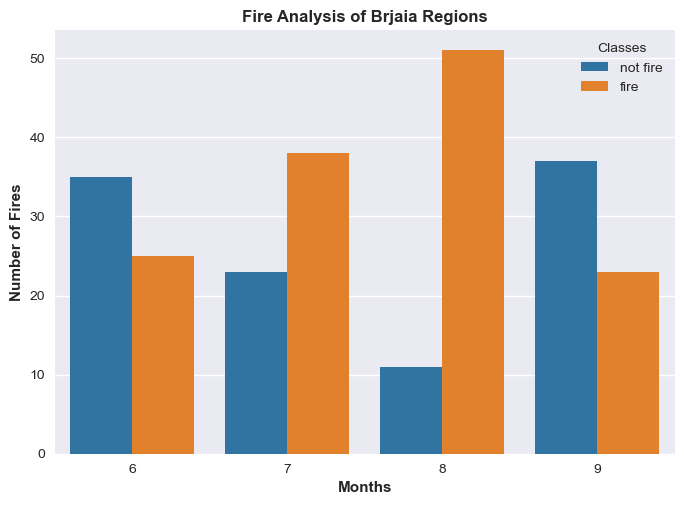

In [161]:
## Monthly Fire Analysis
dftemp=df.loc[df['region']==0]
plt.subplots()
# sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=df, palette="tab10")
plt.ylabel('Number of Fires',weight='bold')
plt.xlabel('Months',weight='bold')
plt.title("Fire Analysis of Brjaia Regions",weight='bold')

Its observed that August and September had the most number of forest fires for both regions. And from the above plot of months, we can understand few things

Most of the fires happened in August and very high Fires happened in only 3 months - June, July and August.

Less Fires was on September

# model training

In [162]:
df_copy

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,0,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,0,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
238,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,1,1
239,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,0,1
240,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,0,1
241,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,0,1


In [163]:
#  we're predicting FWI so
x = df_copy.drop('FWI', axis = 1)
y = df_copy['FWI']

In [164]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state= 40, test_size= 0.25)

In [165]:
#  checking correlation. dropping columns with more than 80% correlation
x_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,region
Temperature,1.000000,-0.670895,-0.309967,-0.323933,0.678800,0.510329,0.409550,0.631343,0.484508,0.542602,0.223795
RH,-0.670895,1.000000,0.242079,0.250252,-0.703033,-0.424401,-0.240701,-0.741406,-0.364836,-0.520424,-0.390832
Ws,-0.309967,0.242079,1.000000,0.272414,-0.227417,-0.007541,0.056127,-0.029194,0.019347,-0.129204,-0.137189
Rain,-0.323933,0.250252,0.272414,1.000000,-0.511986,-0.291812,-0.300094,-0.339451,-0.300894,-0.378860,-0.043905
FFMC,0.678800,-0.703033,-0.227417,-0.511986,1.000000,0.625271,0.523760,0.750848,0.609133,0.798691,0.206310
DMC,0.510329,-0.424401,-0.007541,-0.291812,0.625271,1.000000,0.887003,0.666945,0.982374,0.599226,0.169910
DC,0.409550,-0.240701,0.056127,-0.300094,0.523760,0.887003,1.000000,0.483607,0.947206,0.508630,-0.093126
ISI,0.631343,-0.741406,-0.029194,-0.339451,0.750848,0.666945,0.483607,1.000000,0.623279,0.744079,0.293776
BUI,0.484508,-0.364836,0.019347,-0.300894,0.609133,0.982374,0.947206,0.623279,1.000000,0.594729,0.064223
Classes,0.542602,-0.520424,-0.129204,-0.378860,0.798691,0.599226,0.508630,0.744079,0.594729,1.000000,0.195667


<Axes: >

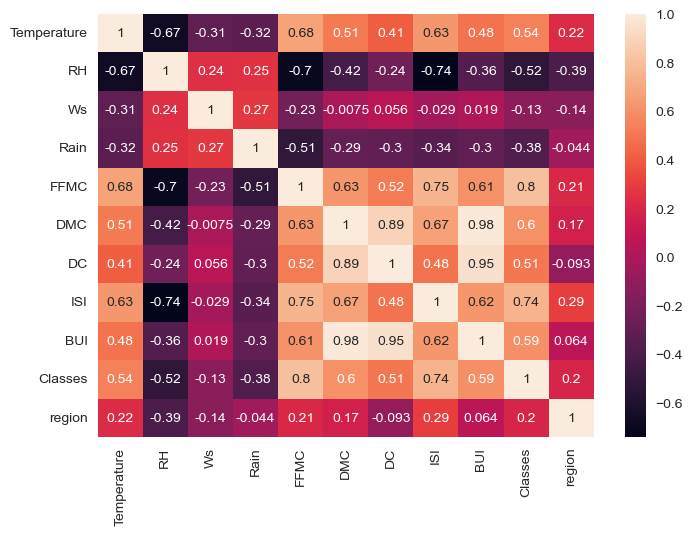

In [166]:
# checking for multicollinearity
sns.heatmap(x_train.corr(), annot=True)

In [167]:
def correlation( dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j])> threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [168]:
corr_features = correlation(x_train, 0.80)
print(corr_features)
# print(x_train)
x_train.drop(corr_features, axis=1, inplace= True)
x_test.drop(corr_features, axis=1, inplace= True)
# print(x_test)

{'BUI', 'DC'}


# Standardization

In [169]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

# Linear Regression Model

In [170]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error 

linreg= LinearRegression()
linreg.fit(x_train , y_train)
y_pred = linreg.predict(x_test)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
rmse=root_mean_squared_error(y_test,y_pred)
print(mae)
print(score)
print(rmse)

0.5340854472870478
0.9884784293605
0.7297855866574968


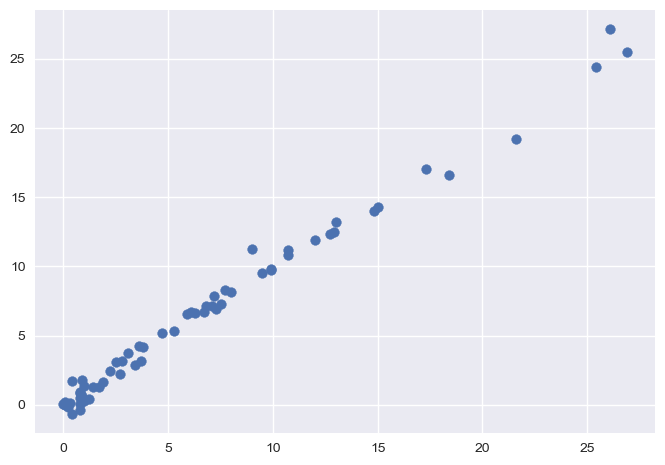

In [171]:
plt.scatter(y_test, y_pred)
# kinda linear

# Lasso Regression

1.1980295954841227
0.9495910626171593
1.5264873499513336


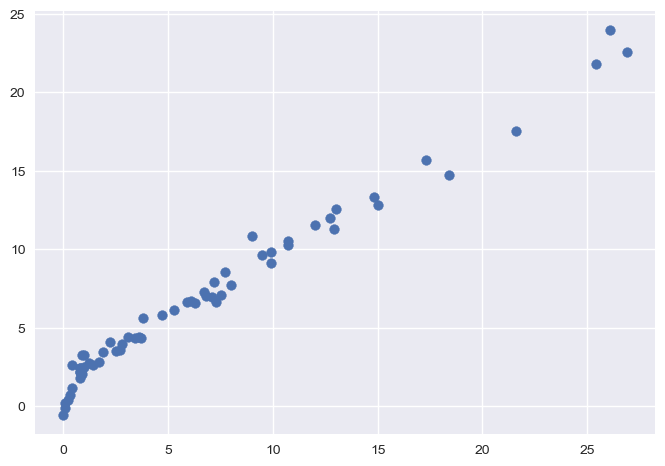

In [172]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score, root_mean_squared_error

lasso= Lasso()
lasso.fit(x_train , y_train)
y_pred = lasso.predict(x_test)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)
rmse=root_mean_squared_error(y_test,y_pred)

print(mae)
print(score)
print(rmse)
plt.scatter(y_test, y_pred)
# reduced

# Cross validation

In [173]:
from sklearn.linear_model import LassoCV
lassocv = LassoCV(cv=5)
lassocv.fit(x_train, y_train)

LassoCV(cv=5)

0.5129869391931778
0.9883614615678514


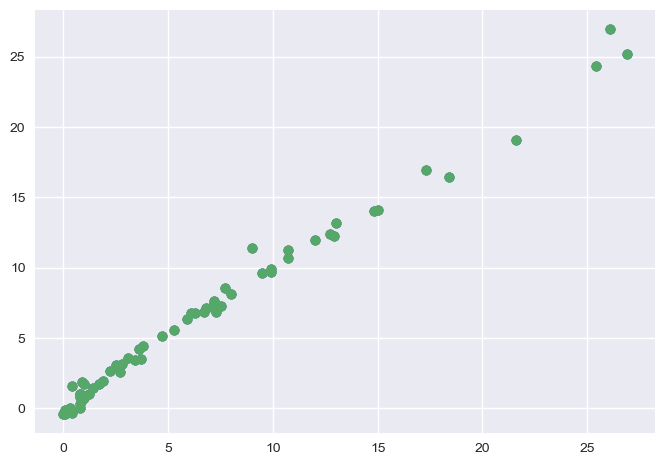

In [174]:
y_pred = lassocv.predict(x_test)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae)
print(score)
plt.scatter(y_test, y_pred)

# ridge regression

0.5458273128650675
0.98807024180513


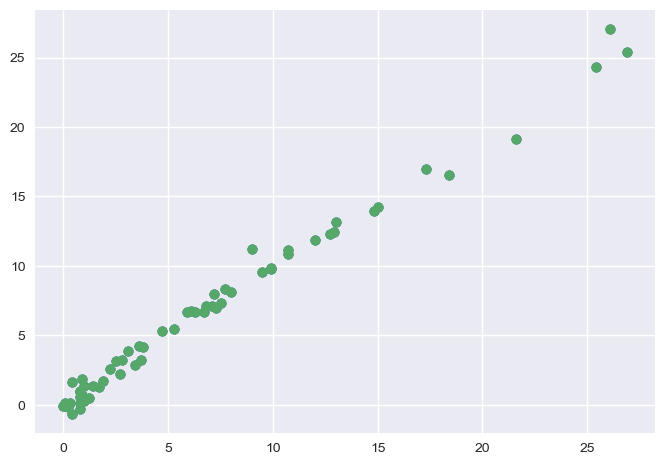

In [175]:
from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae)
print(score)
plt.scatter(y_test, y_pred)

0.5458273128650675
0.98807024180513


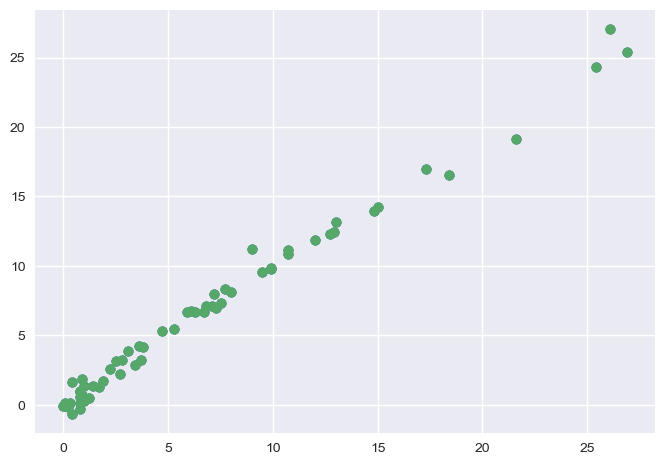

In [176]:
#  ridgecv

from sklearn.linear_model import RidgeCV
ridgecv = RidgeCV(cv=5)
ridgecv.fit(x_train, y_train)

y_pred = ridgecv.predict(x_test)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae)
print(score)
plt.scatter(y_test, y_pred)

In [177]:
ridgecv.get_params()

{'alpha_per_target': False,
 'alphas': (0.1, 1.0, 10.0),
 'cv': 5,
 'fit_intercept': True,
 'gcv_mode': None,
 'scoring': None,
 'store_cv_values': False}

0.5801562328319253
0.9864362559893773


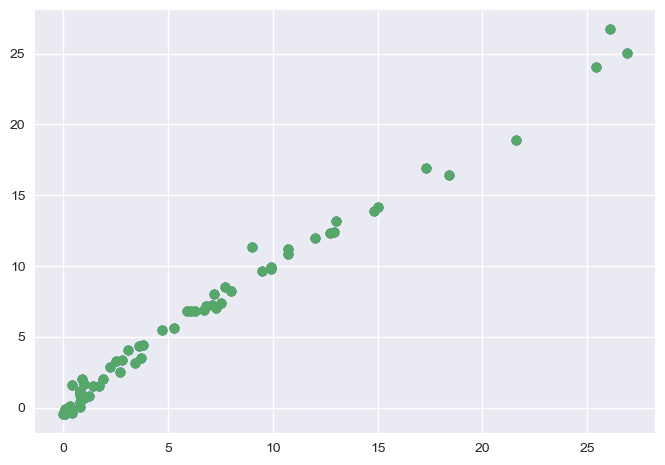

In [178]:
#  elastic net cv

from sklearn.linear_model import ElasticNetCV
encv = ElasticNetCV(cv=5)
encv.fit(x_train, y_train)

y_pred = encv.predict(x_test)
plt.scatter(y_test, y_pred)
mae= mean_absolute_error(y_test, y_pred)
score = r2_score(y_test, y_pred)

print(mae)
print(score)
plt.scatter(y_test, y_pred)

In [179]:
#  whichever gives the best accuracy, pickle it
# LassoCV here

import pickle
pickle.dump(scaler,open('scaler.pkl','wb'))
pickle.dump(lassocv,open('lassocv.pkl','wb'))
